# Import libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [5]:
path=r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/02 Data/Prepared Data'

In [6]:
df=pd.read_pickle(os.path.join(path,'df.pkl'))

In [7]:
df.head()

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Creating bar charts

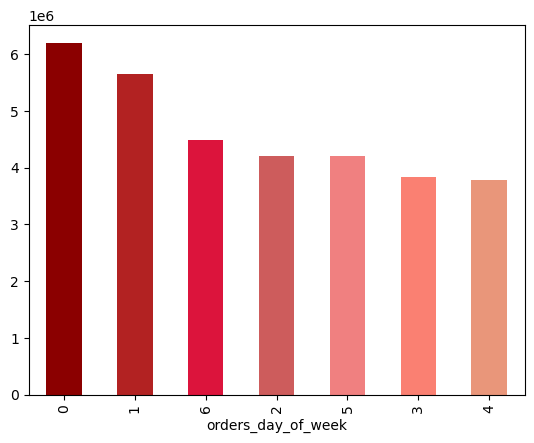

In [9]:
bar=df['orders_day_of_week'].value_counts().plot.bar(color=['darkred','firebrick','crimson','indianred','lightcoral','salmon','darksalmon'])

In [10]:
#export bar chart
bar.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/1orders_dof_bar.png')

## Creating Histograms & Scatterplots

<Axes: ylabel='Frequency'>

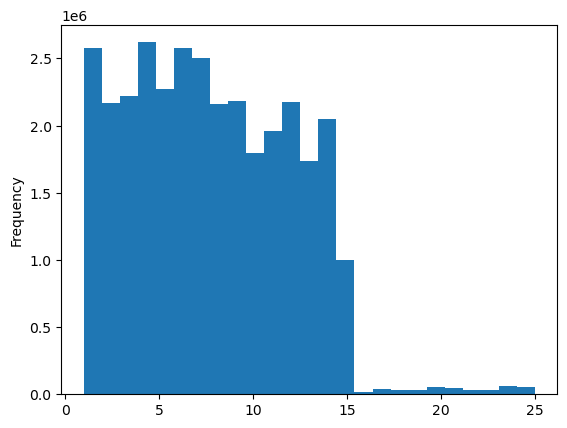

In [12]:
#creats histogram
df['prices'].plot.hist(bins=25)

In [13]:
df['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [14]:
df['prices'].max()

25.0

<Axes: xlabel='prices', ylabel='prices'>

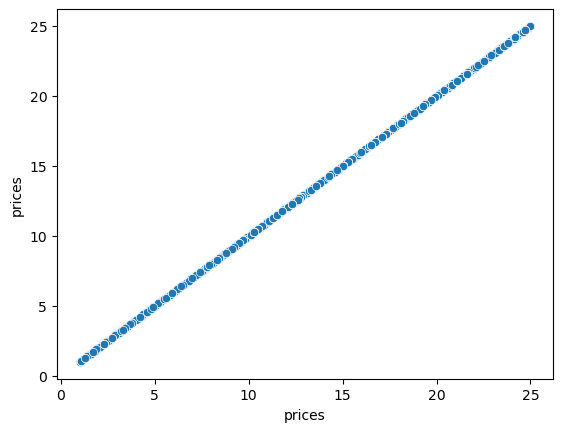

In [15]:
# create Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [16]:
# exploratory checks on the data.
df.loc[df['prices']>100]

,order_id,user_id,user_order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,family_status,income


In [17]:
# turn the outliers into nans 
df.loc[df['prices'] >100, 'prices'] = np.nan

In [18]:
# check for the max
df['prices'].max()

25.0

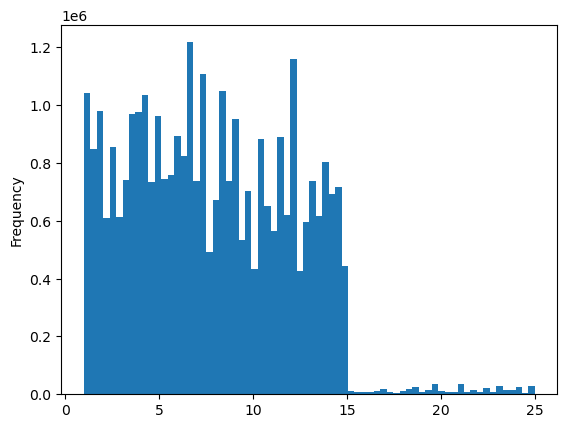

In [19]:
#recreate the histogram 
hist=df['prices'].plot.hist(bins = 70)

In [20]:
#export histogram
hist.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/prices_hist.png')

## Create random subset

In [22]:
# 70/30 split
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [24]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [25]:
#store the 70% dataframe as big , and 30% dataframe as small
big = df[dev]
small = df[~dev]

In [26]:
len(df)

32404859

In [27]:
len(big)+len(small)

32404859

In [28]:
#now create the subset we need for line chart
df_2 = small[['orders_day_of_week','prices']]

## Create line chart

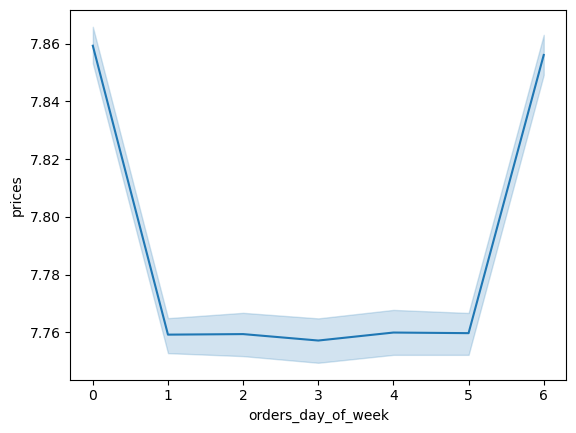

In [30]:
line=sns.lineplot(data=df_2,x='orders_day_of_week',y='prices')

The peaks on days zero and six mean that most money is spent on Friday and Saturday

In [32]:
#export line chart
line.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/1prices_odow_line.png')

# Create (order hour of day) Histogram

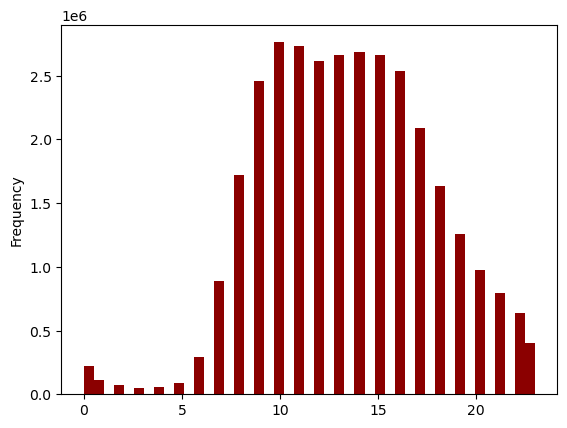

In [34]:
hist_2=df['order_hour_of_day'].plot.hist(bins=45,color='darkred')

orders from 10:00 until 16:00 are the highest

In [36]:
#export histogram
hist_2.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/1hour_of_day_hist.png')

# Create (loyalty_flag) bar chart

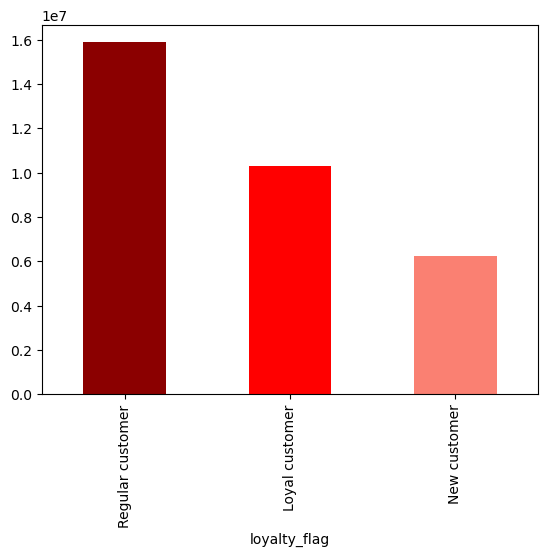

In [38]:
bar_2=df['loyalty_flag'].value_counts().plot.bar(color=['darkred','red','salmon'])

In [39]:
#export bar chart
bar_2.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/1loyalty_flag_bar.png')

# Create (prices, order_hour_of_day) line chart

In [41]:
df_3=small[['order_hour_of_day','prices']]

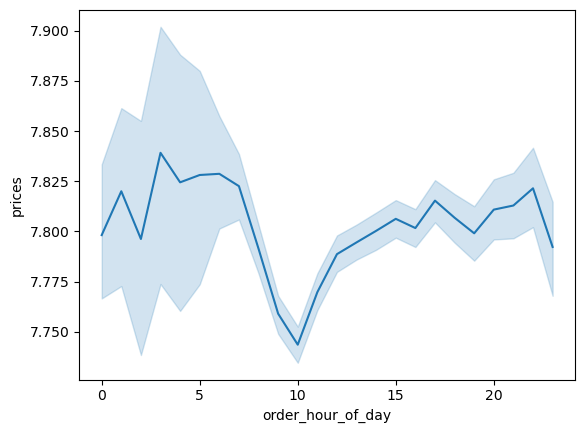

In [42]:
line_2=sns.lineplot(data=df_3,x='order_hour_of_day',y='prices')

from 9:00 until 12:00 mostly people buy the low price products, on the other hand in early morning and at night people buy high price products.

In [93]:
#export line chart
line.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/1prices_odow_line.png')

## Creating a Line chart exploring the connections between Age and number of dependents

In [46]:
df_4=small[['n_dependants','age']]

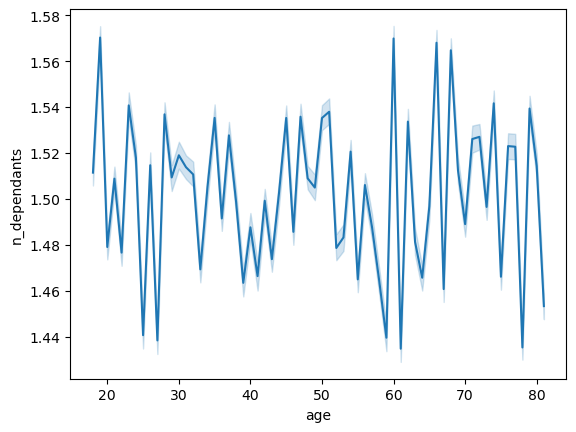

In [47]:
line_4=sns.lineplot(data=df_4,x='age',y='n_dependants')

no relationship between age and number of dependants

In [49]:
#export line chart
line_4.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/age_dependants_line.png')

## create scatterplot to explore whether there’s a connection between age and spending power (income)

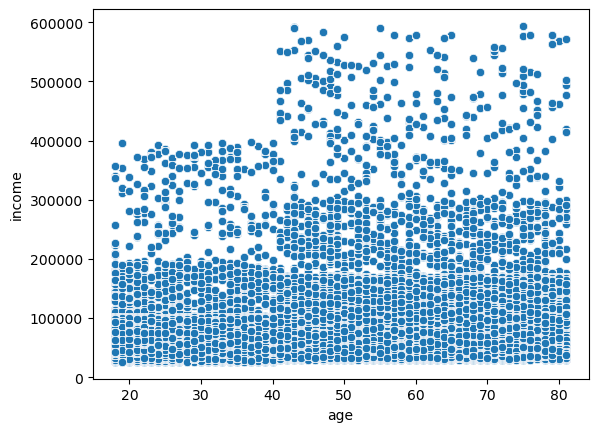

In [51]:
# create Scatterplot
scatter=sns.scatterplot(x = 'age', y = 'income',data = df)

the maximum income for age range 20_40 is 400000, while ages older the 40 have higher income up to 600000.
as in the average income is higher among ages older than 40.

In [53]:
#export scatterplot
scatter.figure.savefig(r'/Users/yasersouri/Desktop/data analysis/Instacart Basket Analysis/04 Analysis/Visualizations/age_income_scatter.png')